In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
sns.set() # setting seaborn default for plots 
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv("C:/Users/HCL/ML Regular 11-1 PM/Data/titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [2]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
#Count number of rows and columns in the dataset
df.shape

(891, 12)

In [4]:
#Number of Numerical feature in dataset

df_num=df.select_dtypes(["int64","float64"])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


In [5]:
# Get some statistical value from the dataset of Numerical Features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Number of categorical feature in data set
df_cat=df.select_dtypes(["object"])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Name        891 non-null object
Sex         891 non-null object
Ticket      891 non-null object
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: object(5)
memory usage: 34.9+ KB


In [7]:
#Count of number of survivers
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

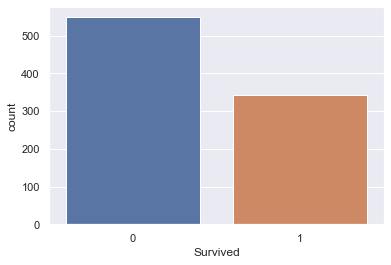

In [8]:
# Visualize count of survivors
sns.countplot(df['Survived'])

In [9]:
def bar_chart(feature):
    survived=df[df['Survived']==1][feature].value_counts()
    dead=df[df['Survived']==0][feature].value_counts()
    df_titanic=pd.DataFrame([survived,dead])
    df_titanic.index=['survived','dead']
    df_titanic.plot(kind='bar',stacked='True',figsize=(10,5))

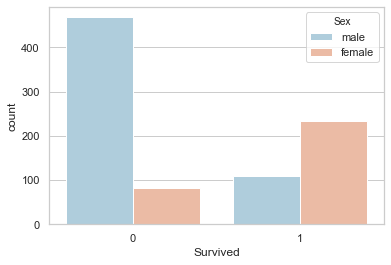

In [10]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

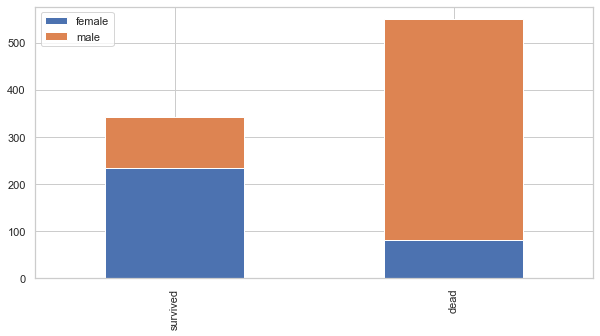

In [11]:
bar_chart('Sex')

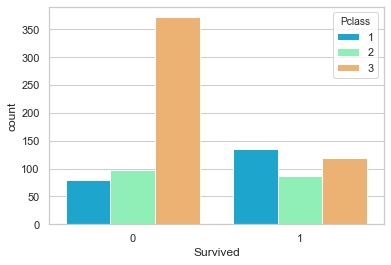

In [12]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

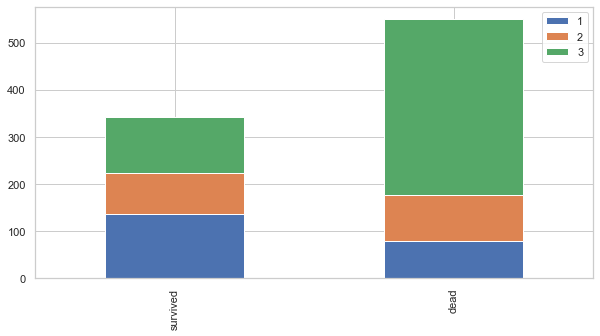

In [13]:
bar_chart('Pclass')

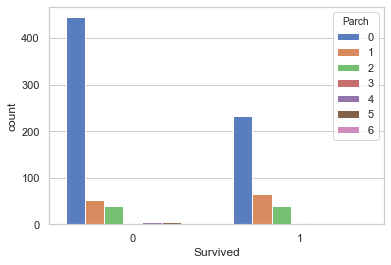

In [14]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Parch',data=df,palette='muted')

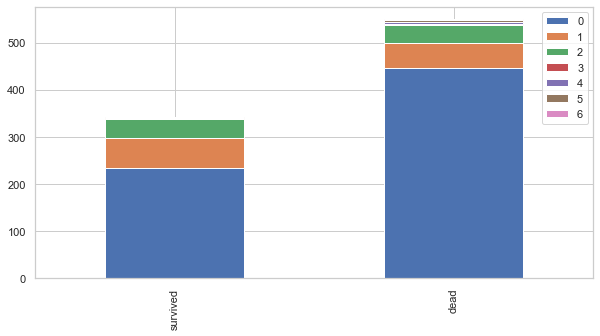

In [15]:
bar_chart('Parch')

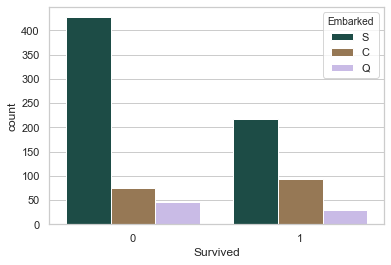

In [16]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Embarked',data=df,palette='cubehelix')

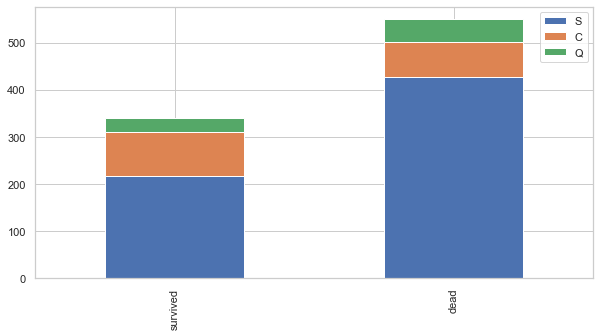

In [17]:
bar_chart('Embarked')

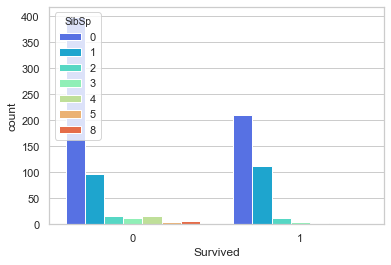

In [18]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='SibSp',data=df,palette='rainbow')

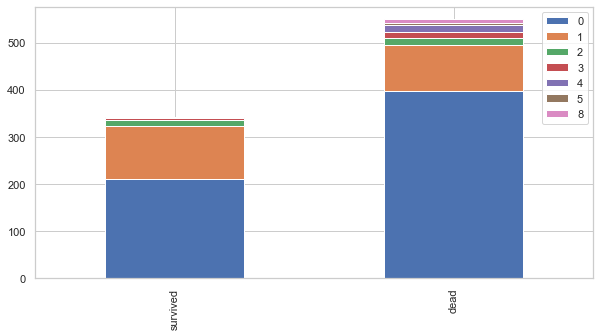

In [19]:
bar_chart('SibSp')

# Feature Engineering

In [20]:
# Survival rate by gender
df.groupby('Sex')[['Survived']].mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


In [21]:
# Survival rate by gender and class
df.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


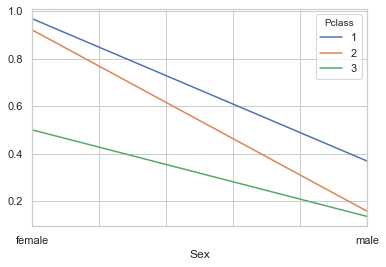

In [22]:
# Survival rate by gender and class visually
df.pivot_table('Survived',index='Sex',columns='Pclass').plot()

# Missing Value Treatement

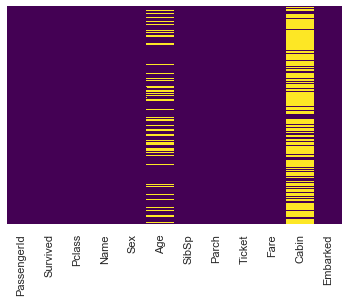

In [23]:
# Visualize number of missing value in each column
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

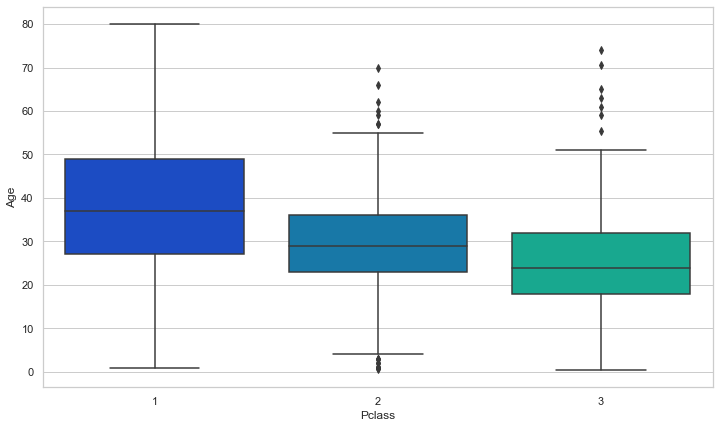

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [25]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age
            
            

In [26]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

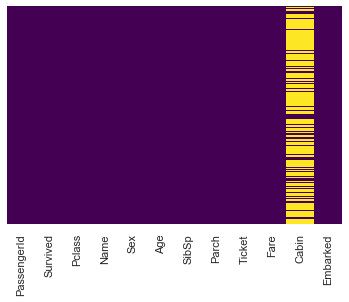

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

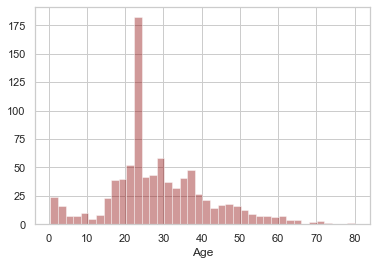

In [28]:
# Distribution of Age feature after Missing value treatment
sns.distplot(df['Age'],kde=False,color='darkred',bins=40)

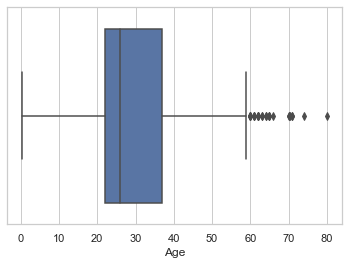

In [29]:
# Checking outlier in the Age column
sns.boxplot('Age',data=df)

In [30]:
z = np.abs(stats.zscore(df.Age))
print(z)

[0.53383369 0.67489052 0.23165264 0.44825473 0.44825473 0.38274316
 1.88361472 2.04473895 0.15610738 1.13819579 1.89364842 2.18579577
 0.68492422 0.75043578 1.13819579 1.95915999 2.04473895 0.00501685
 0.14607368 0.38274316 0.44825473 0.37270946 1.06265053 0.08056211
 1.59146737 0.67489052 0.38274316 0.76046948 0.38274316 0.38274316
 0.82598104 0.59934525 0.38274316 2.79015788 0.08056211 0.97707157
 0.38274316 0.60937895 0.83601474 1.13819579 0.82598104 0.15610738
 0.38274316 1.96919369 0.76046948 0.38274316 0.38274316 0.38274316
 0.38274316 0.83601474 1.66701263 0.60937895 1.50588841 0.00501685
 2.71461261 0.59934525 0.60937895 0.04278948 1.81810316 1.36483158
 0.53383369 0.67489052 1.20370736 1.89364842 0.59934525 0.38274316
 0.00501685 0.76046948 0.91156    0.23165264 0.22161894 0.98710527
 0.60937895 0.23165264 0.22161894 0.3071979  0.38274316 0.38274316
 2.13312691 0.07052841 0.53383369 0.00501685 0.38274316 0.08056211
 0.91156    0.2971642  0.98710527 0.38274316 0.45828843 0.3827

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)
# Find percentage of Null values in Cabin feature
df['Cabin_null'].mean()*100

77.10437710437711

In [33]:
df.groupby(['Survived'])['Cabin_null'].mean()*100

Survived
0    87.613843
1    60.233918
Name: Cabin_null, dtype: float64

In [34]:
df['Cabin']=df['Cabin'].str[:1]
df.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

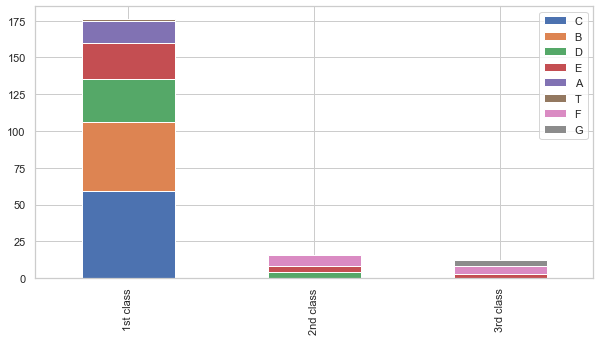

In [35]:
Pclass1=df[df['Pclass']==1]['Cabin'].value_counts()
Pclass2=df[df['Pclass']==2]['Cabin'].value_counts()
Pclass3=df[df['Pclass']==3]['Cabin'].value_counts()
df_cabin=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df_cabin.index=['1st class','2nd class','3rd class']
df_cabin.plot(kind='bar',stacked=True,figsize=(10,5))

In [36]:
cabin_mapping={'A':0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"T":2.8}
df['Cabin']=df['Cabin'].map(cabin_mapping)

In [37]:
df['Cabin'].fillna(df.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [38]:
df['Title']=df['Name'].str.extract("([A-za-z]+)\.")
df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Mme           1
Capt          1
Jonkheer      1
Ms            1
Sir           1
Don           1
Countess      1
Name: Title, dtype: int64

In [39]:
title_mapping={"Mr":8,"Miss":7,"Mrs":6,"Master":5,"Dr":4,"Rev":3,"Col":2,"Major":2,"Mile":2,"Mme":1,"Ms":1,
               "Jonkheer":1,"Don":1,"Lady":1,"Countess":1,"Capt":1,"Sir":1}
df["Title"]=df["Title"].map(title_mapping)

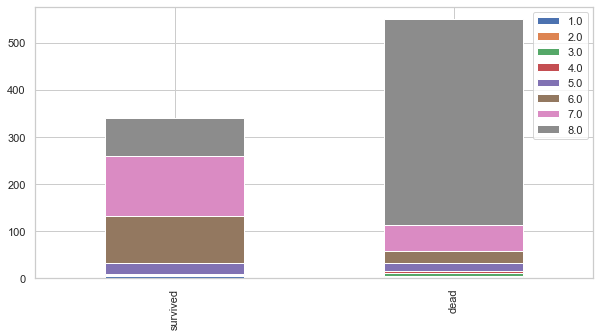

In [40]:
bar_chart("Title")

In [41]:
sex_mapping={"male":0,"female":1}
df["Sex"]=df["Sex"].map(sex_mapping)

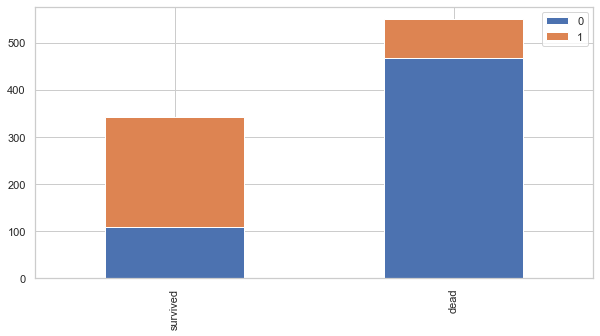

In [42]:
bar_chart("Sex")

In [43]:
df["FamilySize"]=df["SibSp"]+df["Parch"]+1

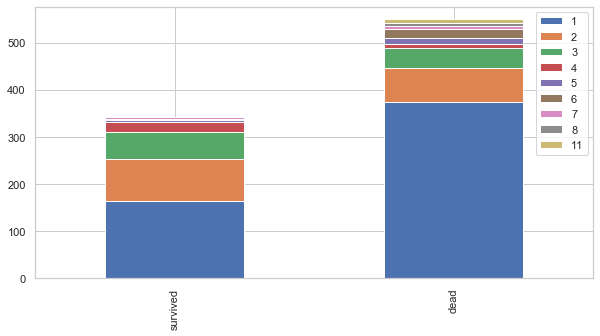

In [44]:
bar_chart("FamilySize")

In [45]:
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,7:2.4,8:2.8,9:3.2,10:3.6,11:4.0}
df["FamilySize"]=df["FamilySize"].map(family_mapping)

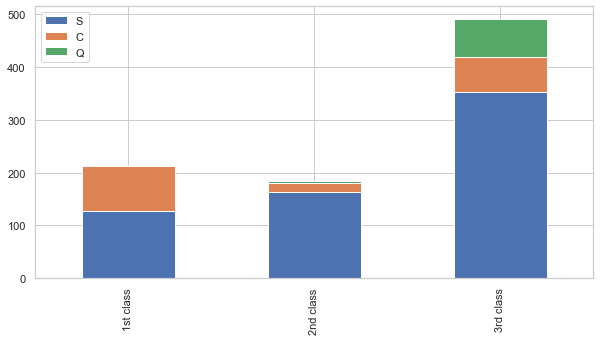

In [46]:
Pclass1=df[df['Pclass']==1]['Embarked'].value_counts()
Pclass2=df[df['Pclass']==2]['Embarked'].value_counts()
Pclass3=df[df['Pclass']==3]['Embarked'].value_counts()
df_embark=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df_embark.index=['1st class','2nd class','3rd class']
df_embark.plot(kind='bar',stacked=True,figsize=(10,5))

In [47]:
df["Embarked"]=df["Embarked"].fillna("S")

In [48]:
Embarked_mapping={"S":0,"C":1,"Q":2}
df["Embarked"]=df["Embarked"].map(Embarked_mapping)

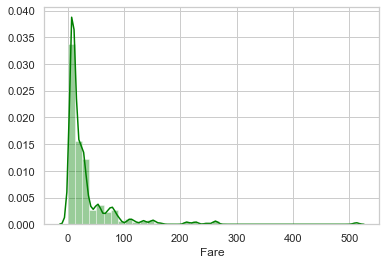

In [49]:
sns.distplot(df['Fare'],kde=True,color='Green',bins=40)

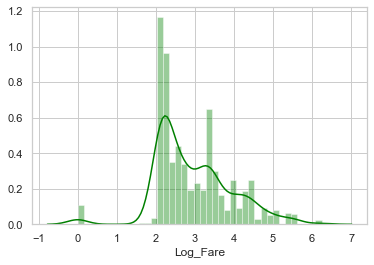

In [50]:
#Log normal transformation 
df["Log_Fare"]=np.log(df["Fare"]+1)
sns.distplot(df['Log_Fare'],kde=True,color='Green',bins=40)

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,Title,FamilySize,Log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,0,1,8.0,0.4,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.8,1,0,6.0,0.4,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,7.0,0.0,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.8,0,0,6.0,0.4,3.990834
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.0,0,1,8.0,0.0,2.202765


In [52]:
#Survival rate by Sex, Age and Pclass
age=pd.cut(df['Age'],[0,20,40,60,80])
df.pivot_table('Survived',['Sex',age],'Pclass')

Pclass               1         2         3
Sex Age                                   
0   (0, 20]   0.571429  0.526316  0.197368
    (20, 40]  0.415385  0.073529  0.125000
    (40, 60]  0.342105  0.055556  0.074074
    (60, 80]  0.083333  0.333333  0.000000
1   (0, 20]   0.928571  1.000000  0.510638
    (20, 40]  0.981481  0.914894  0.534091
    (40, 60]  0.958333  0.846154  0.000000
    (60, 80]  1.000000       NaN  1.000000

In [53]:
#Survival rate by Embarked, Age and Pclass
age=pd.cut(df['Age'],[0,20,40,60,80])
df.pivot_table('Survived',['Embarked',age],'Pclass')

Pclass                    1         2         3
Embarked Age                                   
0        (0, 20]   0.785714  0.709677  0.239130
         (20, 40]  0.637681  0.410000  0.185841
         (40, 60]  0.514286  0.400000  0.062500
         (60, 80]  0.272727  0.333333  0.333333
1        (0, 20]   0.857143  1.000000  0.619048
         (20, 40]  0.714286  0.384615  0.279070
         (40, 60]  0.692308       NaN  0.000000
         (60, 80]  0.000000       NaN       NaN
2        (0, 20]        NaN       NaN  0.400000
         (20, 40]  1.000000  1.000000  0.389831
         (40, 60]  0.000000  0.000000  0.000000
         (60, 80]       NaN       NaN  0.000000

In [54]:
feature_drop=["PassengerId","Name","SibSp","Parch","Ticket","Fare"]
df.drop(feature_drop,axis=1,inplace=True)

In [55]:
df.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Cabin         float64
Embarked        int64
Cabin_null      int32
Title         float64
FamilySize    float64
Log_Fare      float64
dtype: object

In [56]:
df["Log_Fare"].apply(np.ceil)

0      3.0
1      5.0
2      3.0
3      4.0
4      3.0
5      3.0
6      4.0
7      4.0
8      3.0
9      4.0
10     3.0
11     4.0
12     3.0
13     4.0
14     3.0
15     3.0
16     4.0
17     3.0
18     3.0
19     3.0
20     4.0
21     3.0
22     3.0
23     4.0
24     4.0
25     4.0
26     3.0
27     6.0
28     3.0
29     3.0
      ... 
861    3.0
862    4.0
863    5.0
864    3.0
865    3.0
866    3.0
867    4.0
868    3.0
869    3.0
870    3.0
871    4.0
872    2.0
873    3.0
874    4.0
875    3.0
876    3.0
877    3.0
878    3.0
879    5.0
880    4.0
881    3.0
882    3.0
883    3.0
884    3.0
885    4.0
886    3.0
887    4.0
888    4.0
889    4.0
890    3.0
Name: Log_Fare, Length: 891, dtype: float64

In [57]:
df=df.dropna()
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Cabin         0
Embarked      0
Cabin_null    0
Title         0
FamilySize    0
Log_Fare      0
dtype: int64

### Feature Selection

In [58]:
## univariate Feature Selection
x=df.drop("Survived",axis=1)
y=df["Survived"]
x.head()

,Pclass,Sex,Age,Cabin,Embarked,Cabin_null,Title,FamilySize,Log_Fare
0,3,0,22.0,2.0,0,1,8.0,0.4,2.110213
1,1,1,38.0,0.8,1,0,6.0,0.4,4.280593
2,3,1,26.0,2.0,0,1,7.0,0.0,2.188856
3,1,1,35.0,0.8,0,0,6.0,0.4,3.990834
4,3,0,35.0,2.0,0,1,8.0,0.0,2.202765


In [59]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [61]:
dt=DecisionTreeClassifier(min_samples_leaf=90)
dt.fit(x_train,y_train)
dt_score_tr=dt.score(x_train,y_train)
dt_score_te=dt.score(x_test,y_test)

In [62]:
dt_score_tr

0.8102893890675241

In [63]:
dt_score_te

0.7378277153558053

In [64]:
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.96      0.80       144
           1       0.91      0.48      0.63       123

    accuracy                           0.74       267
   macro avg       0.80      0.72      0.71       267
weighted avg       0.79      0.74      0.72       267



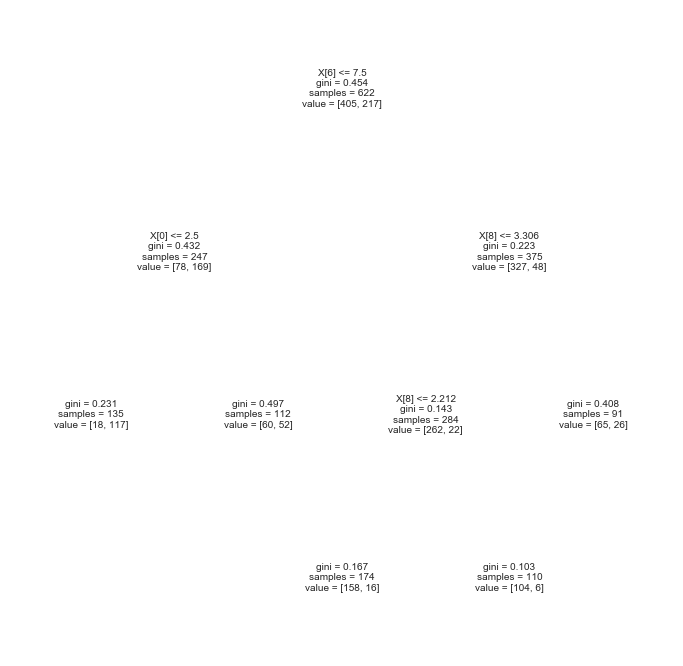

In [65]:
fig,ax=plt.subplots(figsize=(12,12))
tree.plot_tree(dt.fit(x_train,y_train),max_depth=4,fontsize=10)
plt.savefig("tree_high_dpi_titanic",dpi=100)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)

In [68]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 114 to 37
Data columns (total 9 columns):
Pclass        622 non-null int64
Sex           622 non-null int64
Age           622 non-null float64
Cabin         622 non-null float64
Embarked      622 non-null int64
Cabin_null    622 non-null int32
Title         622 non-null float64
FamilySize    622 non-null float64
Log_Fare      622 non-null float64
dtypes: float64(5), int32(1), int64(3)
memory usage: 46.2 KB


In [69]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=8, n_estimators=10, random_state=1)

In [70]:
y_pred=rf.predict(x_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       144
           1       0.80      0.59      0.68       123

    accuracy                           0.74       267
   macro avg       0.76      0.73      0.73       267
weighted avg       0.75      0.74      0.73       267



In [72]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates=[0.05,0.1,0.25,0.5,0.75,1]
for i in learning_rates:
    gb=GradientBoostingClassifier(n_estimators=20,
                                 learning_rate=i,
                                 max_features=8,
                                 max_depth=2,
                                 random_state=1)
    gb.fit(x_train,y_train)
    print("Learning rate::",i)
    print("Accuracy score(training):{0:.3f}".format(gb.score(x_train,y_train)))
    print("Accuracy score(training):{0:.3f}".format(gb.score(x_test,y_test)))

Learning rate:: 0.05
Accuracy score(training):0.834
Accuracy score(training):0.742
Learning rate:: 0.1
Accuracy score(training):0.849
Accuracy score(training):0.783
Learning rate:: 0.25
Accuracy score(training):0.879
Accuracy score(training):0.760
Learning rate:: 0.5
Accuracy score(training):0.894
Accuracy score(training):0.775
Learning rate:: 0.75
Accuracy score(training):0.907
Accuracy score(training):0.779
Learning rate:: 1
Accuracy score(training):0.907
Accuracy score(training):0.764


In [73]:
from xgboost import XGBClassifier
xgboost=XGBClassifier(learning_rate=0.05,
                     n_estimators=500,
                     max_depth=2,
                     min_child_weight=1)
xgboost.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       144
           1       0.81      0.64      0.71       123

    accuracy                           0.76       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.76      0.76       267



## Cross validation (K - Fold)

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

## KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=13)
scoring='accuracy'
score=cross_val_score(clf,x,y,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.79775281 0.7752809  0.7752809  0.74157303 0.69662921 0.7752809
 0.82022472 0.80898876 0.76404494 0.80681818]


In [76]:
round(np.mean(score)*100,2)

77.62

### random Forest Classifier

In [77]:
clf=RandomForestClassifier(n_estimators=13)
scoring='accuracy'
score=cross_val_score(clf,x,y,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.82022472 0.80898876 0.87640449 0.84269663 0.85393258 0.78651685
 0.88764045 0.79775281 0.75280899 0.79545455]


In [78]:
round(np.mean(score)*100,2)

82.22

### XGBoostClassifier

In [79]:
clf=XGBClassifier(n_estimators=13)
scoring='accuracy'
score=cross_val_score(clf,x,y,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.86516854 0.83146067 0.85393258 0.80898876 0.82022472 0.82022472
 0.87640449 0.82022472 0.7752809  0.82954545]


In [80]:
round(np.mean(score)*100,2)

83.01